In [1]:
# The new Foreign Minister of Germany announced Germany will follow a 'Ferminist Foreign Policy'
# (FFP) approach. It remained largely open what FFP meant. The coalition agreement and subesequent documents 
# refered to equal access to opportunities, education,jobs, represntation of women in senior positions, 
# reproductive choice. 
# If AB would walk the talk, whow would that alter the map of partners?
# To apply the skills accquired at IH, the project combines some traditional developmenyt indicators with those
# mentioned above to come up with clusters of countries sharing development and gedern
# dynamics 

In [2]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

import researchpy as rp # t-test - 3. 
from scipy.stats import ttest_ind # independece of sex disaggregated vars 3.

from sklearn.preprocessing import StandardScaler # scaling 4. 

from sklearn.cluster import KMeans  # chap 5
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px


from sklearn.decomposition import PCA # rund PCA 6



In [3]:
#eco = pd.read_csv('econ_gdp.csv') - Corrupted?
eco = pd.read_csv('gdp.csv')
gen = pd.read_csv('gender.csv')
fert = pd.read_csv('fertility.csv')
br = pd.read_csv('birthRegistry.csv')
sdg = pd.read_csv('sdg.csv')
le_tot = pd.read_csv('life_ex_tot.csv')
poverty = pd.read_csv('poverty_190.csv')
literacy = pd.read_csv('literacyrate.csv')

## All indiactors can be found in the WB data base


In [4]:

df = pd.read_csv('220516_compiled_data.csv') ## compiled df, used from 4. onwards

# Uniforming and joining data 

In [5]:
## Birth registry 

br['birth_register'] = br.mean(axis=1)

br.drop(br.iloc[:, 1:14], inplace = True, axis = 1) # drop not used cols

#br = br.iloc[:, 0:] 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/2960742624.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  br['birth_register'] = br.mean(axis=1)


In [6]:
br

,country,birth_register
0,Aruba,NaN
1,Africa Eastern and Southern,36.951135
2,Afghanistan,42.300000
3,Africa Western and Central,55.179299
4,Angola,25.000000
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",23.900000
263,South Africa,87.000000
264,Zambia,12.700000


In [7]:
sdg

,country,water_perc,sani_perc,elec_perc,slum_perc,homocides,Internetuse
0,Afghanistan,27.6,..,97.7,62.7,9.8,8.3
1,Albania,70.7,47.7,99.9,..,2.2,62.4
2,Algeria,72.4,17.6,99.6,..,1.4,47.7
3,American Samoa,98.4,..,..,..,7.2,..
4,Andorra,90.6,100,100,..,0,91.6
...,...,...,...,...,...,...,...
329,General comments,NaN,NaN,NaN,NaN,NaN,NaN
330,Please cite the International Telecommunicatio...,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#fertility 


fert['fertility'] = fert.mean(axis=1) # average of last xx years
fert = fert[['country', 'fertility']]
#fert.drop(fert.iloc[:, 1:11], inplace = True, axis = 1) # drop not used cols

fert

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/2056428402.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fert['fertility'] = fert.mean(axis=1) # average of last xx years


,country,fertility
0,Aruba,1.877714
1,Africa Eastern and Southern,4.498405
2,Afghanistan,4.648857
3,Africa Western and Central,5.181653
4,Angola,5.608000
...,...,...
261,Kosovo,2.031429
262,"Yemen, Rep.",3.901000
263,South Africa,2.432286
264,Zambia,4.737714


In [9]:
#literacy rate 


literacy['literacy'] = literacy.mean(axis=1)  # average of last 10 yeras
literacy= literacy[['country', 'literacy']]


literacy

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/2128451589.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  literacy['literacy'] = literacy.mean(axis=1)  # average of last 10 yeras


,country,literacy
0,Aruba,97.807419
1,Africa Eastern and Southern,NaN
2,Afghanistan,34.357446
3,Africa Western and Central,NaN
4,Angola,66.030113
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",NaN
263,South Africa,92.901512
264,Zambia,86.747963


In [10]:
# poverty 


poverty['poverty'] = poverty.mean(axis=1)  # average of last 10 yeras
poverty= poverty[['country', 'poverty']]


poverty

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/2160662122.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  poverty['poverty'] = poverty.mean(axis=1)  # average of last 10 yeras


,country,poverty
0,Aruba,NaN
1,Africa Eastern and Southern,NaN
2,Afghanistan,NaN
3,Africa Western and Central,NaN
4,Angola,49.900000
...,...,...
261,Kosovo,0.785714
262,"Yemen, Rep.",18.300000
263,South Africa,18.700000
264,Zambia,58.700000


In [11]:
# Life expectancy at birth


le_tot['life_expectancy'] = le_tot.mean(axis=1)  # average of last 10 yeras
le_tot= le_tot[['country', 'life_expectancy']]



/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/497789032.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  le_tot['life_expectancy'] = le_tot.mean(axis=1)  # average of last 10 yeras


In [12]:
#le_tot

### Join data frames

In [13]:
df = [eco, gen, fert, br,sdg, poverty, literacy, le_tot] # compile all data in one list


# Merge all data

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='inner'), df)

df_merged.columns # Check 
#df_merged.info

Index(['country', 'population', 'gni', 'gni_pc', 'ppp_gni', 'ppp_gni_pc',
       'lifeEx_m', 'lifeEx_f', 'married_by_18', 'mobile_money_m',
       'mobile_money_m.1', 'employment_m', 'eomployment_f', 'firm_f_ownership',
       'share_senior_f', 'parlia_w', 'fertility', 'birth_register',
       'water_perc', 'sani_perc', 'elec_perc', 'slum_perc', 'homocides',
       'Internetuse', 'poverty', 'literacy', 'life_expectancy'],
      dtype='object')

In [14]:
# rename columns

df_merged.rename(columns={
                   'eomployment_f': 'employment_f', 
                  'mobile_money_m.1': 'mobile_money_f'},
          inplace=True, errors='raise')

### Recode missing values 


In [15]:
#df_merged = df_merged.replace('..', np.nan)
df_merged.replace(',','', regex=True, inplace=True)

# Familizarize with data 

In [16]:
#df_merged.tail(20)

In [17]:
df_merged.shape

(225, 27)

In [18]:
#df_merged['gni_pc'].isna

## Seperate groups and countries 

In [19]:
country = df_merged['country'] # Seperate country to be able to change type
df_merged.drop('country', axis=1, inplace=True)



In [20]:
#df_merged = df_merged.astype('int')


In [21]:
df_merged = df_merged.apply(pd.to_numeric, errors= 'coerce') # chnage type
df_merged.dtypes

population          float64
gni                 float64
gni_pc              float64
ppp_gni             float64
ppp_gni_pc          float64
lifeEx_m            float64
lifeEx_f            float64
married_by_18       float64
mobile_money_m      float64
mobile_money_f      float64
employment_m        float64
employment_f        float64
firm_f_ownership    float64
share_senior_f      float64
parlia_w            float64
fertility           float64
birth_register      float64
water_perc          float64
sani_perc           float64
elec_perc           float64
slum_perc           float64
homocides           float64
Internetuse         float64
poverty             float64
literacy            float64
life_expectancy     float64
dtype: object

In [22]:
df_merged['country'] = country  # add country col back

In [23]:
df_merged

,population,gni,gni_pc,ppp_gni,ppp_gni_pc,lifeEx_m,lifeEx_f,married_by_18,mobile_money_m,mobile_money_f,...,water_perc,sani_perc,elec_perc,slum_perc,homocides,Internetuse,poverty,literacy,life_expectancy,country
0,38.0,20.0,530.0,83.3,2190.0,63.7,66.7,28.3,22.5,7.2,...,27.6,NaN,97.7,62.7,9.8,8.3,NaN,34.357446,64.477000,Afghanistan
1,2.9,14.9,5220.0,41.3,14450.0,77.2,80.3,11.8,42.0,38.1,...,70.7,47.7,99.9,NaN,2.2,62.4,0.500000,97.411140,78.448800,Albania
2,43.1,172.5,4010.0,504.8,11720.0,75.9,78.3,3.8,56.3,29.3,...,72.4,17.6,99.6,NaN,1.4,47.7,0.400000,81.407837,76.686600,Algeria
3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.4,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,American Samoa
4,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.6,100.0,100.0,NaN,0.0,91.6,NaN,NaN,NaN,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1107.0,1720.8,1555.0,4207.0,3801.0,60.2,63.7,NaN,48.4,36.9,...,30.2,21.3,43.4,55.3,9.4,22.3,41.300000,63.569308,61.234800,Sub-Saharan Africa
221,668.5,547.9,820.0,1637.7,2450.0,62.2,66.0,NaN,40.0,29.9,...,28.6,17.6,38.4,68.2,7.3,14.1,46.512500,58.923505,63.368600,Low income
222,2913.4,6340.1,2176.0,19697.9,6761.0,67.6,71.1,NaN,62.7,53.0,...,60.0,45.7,85.7,32.2,4.5,25.7,15.025000,73.815040,68.853723,Lower middle income
223,2855.9,25884.4,9064.0,49338.8,17276.0,73.4,78.7,NaN,77.0,69.3,...,75.6,57.8,99.3,23.2,6.7,58.8,2.566667,95.254961,75.694861,Upper middle income


In [24]:
df_country = df_merged.iloc[:213,:]
df_grouped = df_merged.iloc[213:,:] # seperate regions

In [25]:
#df_country.dtypes

In [26]:
#df_country.shape
#df_country.info

## Missing values

In [27]:
percent_missing = df_country.isnull().sum() * 100 / len(df_country)
percent_missing

population           0.469484
gni                  9.389671
gni_pc               9.389671
ppp_gni             10.328638
ppp_gni_pc          10.328638
lifeEx_m             7.042254
lifeEx_f             7.042254
married_by_18       52.112676
mobile_money_m      32.863850
mobile_money_f      32.863850
employment_m        12.676056
employment_f        12.676056
firm_f_ownership    49.765258
share_senior_f      53.051643
parlia_w            10.798122
fertility            6.103286
birth_register      24.413146
water_perc          39.906103
sani_perc           41.314554
elec_perc            0.469484
slum_perc           55.868545
homocides           20.657277
Internetuse          5.164319
poverty             28.638498
literacy            30.516432
life_expectancy      6.103286
country              0.000000
dtype: float64

# Driscribing the data frame  

In [28]:
df_country.drop(['population', 'gni', 'ppp_gni', 'ppp_gni_pc', 'sani_perc', 'slum_perc'], axis = 1, inplace = True) 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/1761406096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.drop(['population', 'gni', 'ppp_gni', 'ppp_gni_pc', 'sani_perc', 'slum_perc'], axis = 1, inplace = True)


In [29]:
df_country

,gni_pc,lifeEx_m,lifeEx_f,married_by_18,mobile_money_m,mobile_money_f,employment_m,employment_f,firm_f_ownership,share_senior_f,...,fertility,birth_register,water_perc,elec_perc,homocides,Internetuse,poverty,literacy,life_expectancy,country
0,530.0,63.7,66.7,28.3,22.5,7.2,20.3,8.2,2.2,4.3,...,4.648857,42.300000,27.6,97.7,9.8,8.3,NaN,34.357446,64.47700,Afghanistan
1,5220.0,77.2,80.3,11.8,42.0,38.1,44.2,47.9,13.1,22.6,...,1.636571,98.400000,70.7,99.9,2.2,62.4,0.5,97.411140,78.44880,Albania
2,4010.0,75.9,78.3,3.8,56.3,29.3,66.4,74.5,NaN,NaN,...,3.016429,99.600000,72.4,99.6,1.4,47.7,0.4,81.407837,76.68660,Algeria
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.4,NaN,7.2,NaN,NaN,NaN,NaN,American Samoa
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.000000,90.6,100.0,0.0,91.6,NaN,NaN,NaN,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,NaN,76.6,83.2,NaN,NaN,NaN,93.4,93.4,NaN,NaN,...,2.072857,NaN,97.9,100.0,49.3,64.4,NaN,NaN,79.50878,Virgin Islands (U.S.)
209,4190.0,72.6,75.9,13.4,34.4,15.9,70.3,77.3,10.7,15.5,...,3.756571,98.133333,79.7,99.7,1.2,63.3,0.5,96.518783,73.89800,West Bank and Gaza
210,940.0,64.5,67.9,31.9,NaN,NaN,45.4,38.4,6.6,4.5,...,3.901000,23.900000,NaN,79.2,6.8,26.7,18.3,NaN,66.11500,Yemen Rep.
211,1430.0,61.1,67.2,29.0,51.7,40.3,34.5,17.8,43.7,28.5,...,4.737714,12.700000,NaN,40.3,5.4,NaN,58.7,86.747963,63.41940,Zambia


- based on missing values above, choose gdp pc as economic proxy
- Drop slum_perc due to high missing value and proxy for urbanization is not really needed 
- drop sanitation due to high number of missing values

## Variable discription

-  pop_density = population denstity (latest availabe year)
- gdp_pc = GDP per capita (latest availabe year)
- lifeEx_m = Life expectancy at birth for male population (latest availabe year)
- lifeEx_f = Life expectancy at birth for female population (latest availabe year)
- married_by_18 = percentatge of female population bteween 18 and 24 married by the age of 18
- mobile_money_m = percent of mobile money accounts held by men
- mobile_money_f = percent of mobile money accounts held by women
- ....@Me: I need to finish this list



##  Describing the data (country dataframe only)

In [30]:
# Percentiles
df_country.describe(percentiles = [.25, .5, .75 ,.95])

,gni_pc,lifeEx_m,lifeEx_f,married_by_18,mobile_money_m,mobile_money_f,employment_m,employment_f,firm_f_ownership,share_senior_f,parlia_w,fertility,birth_register,water_perc,elec_perc,homocides,Internetuse,poverty,literacy,life_expectancy
count,193.000000,198.000000,198.000000,102.000000,143.000000,143.000000,186.000000,186.000000,107.000000,100.000000,190.000000,200.000000,161.000000,128.000000,212.000000,169.000000,202.000000,152.000000,148.000000,200.000000
mean,15624.041451,70.586364,75.461616,21.837255,64.592308,57.695804,60.853226,59.672581,33.931776,29.641000,24.636842,2.681141,83.691925,73.953906,85.162264,7.752663,54.784653,12.591095,83.418932,72.747695
std,20937.521996,7.194461,7.613076,13.735053,25.124266,28.480134,23.663011,31.012206,15.989912,10.101036,12.955753,1.286418,24.118053,29.659259,25.518520,12.960595,28.557085,19.408177,19.367797,7.547173
min,280.000000,51.500000,55.900000,0.000000,12.500000,4.700000,7.300000,1.000000,2.200000,4.200000,0.000000,1.057143,2.700000,5.600000,4.200000,0.000000,1.300000,0.000000,24.157270,52.720000
25%,2290.000000,65.850000,70.125000,10.900000,45.600000,33.100000,44.225000,30.125000,22.850000,22.750000,15.000000,1.686071,73.900000,54.225000,82.200000,1.200000,28.400000,0.438333,73.935326,67.639200
50%,6090.000000,71.300000,77.250000,21.350000,62.400000,53.900000,65.850000,67.050000,34.900000,30.300000,24.000000,2.210857,96.800000,88.950000,99.900000,2.800000,59.400000,2.262500,92.974389,74.197037
75%,19290.000000,75.975000,80.900000,30.100000,87.600000,82.900000,80.475000,88.250000,43.600000,36.325000,34.000000,3.595107,100.000000,98.450000,100.000000,8.200000,80.100000,18.800000,98.056773,78.218780
95%,62288.000000,80.800000,85.115000,46.345000,99.390000,99.200000,92.025000,95.425000,64.400000,43.815000,46.550000,5.116757,100.000000,100.000000,100.000000,33.480000,96.375000,57.875000,99.785291,82.793488
max,117730.000000,82.900000,88.000000,61.000000,100.000000,100.000000,99.600000,99.500000,70.400000,54.600000,61.000000,6.996286,100.000000,100.000000,100.000000,105.200000,99.500000,78.800000,99.989775,84.861463


array([[<AxesSubplot:title={'center':'gni_pc'}>,
        <AxesSubplot:title={'center':'lifeEx_m'}>,
        <AxesSubplot:title={'center':'lifeEx_f'}>,
        <AxesSubplot:title={'center':'married_by_18'}>],
       [<AxesSubplot:title={'center':'mobile_money_m'}>,
        <AxesSubplot:title={'center':'mobile_money_f'}>,
        <AxesSubplot:title={'center':'employment_m'}>,
        <AxesSubplot:title={'center':'employment_f'}>],
       [<AxesSubplot:title={'center':'firm_f_ownership'}>,
        <AxesSubplot:title={'center':'share_senior_f'}>,
        <AxesSubplot:title={'center':'parlia_w'}>,
        <AxesSubplot:title={'center':'fertility'}>],
       [<AxesSubplot:title={'center':'birth_register'}>,
        <AxesSubplot:title={'center':'water_perc'}>,
        <AxesSubplot:title={'center':'elec_perc'}>,
        <AxesSubplot:title={'center':'homocides'}>],
       [<AxesSubplot:title={'center':'Internetuse'}>,
        <AxesSubplot:title={'center':'poverty'}>,
        <AxesSubplot:title={

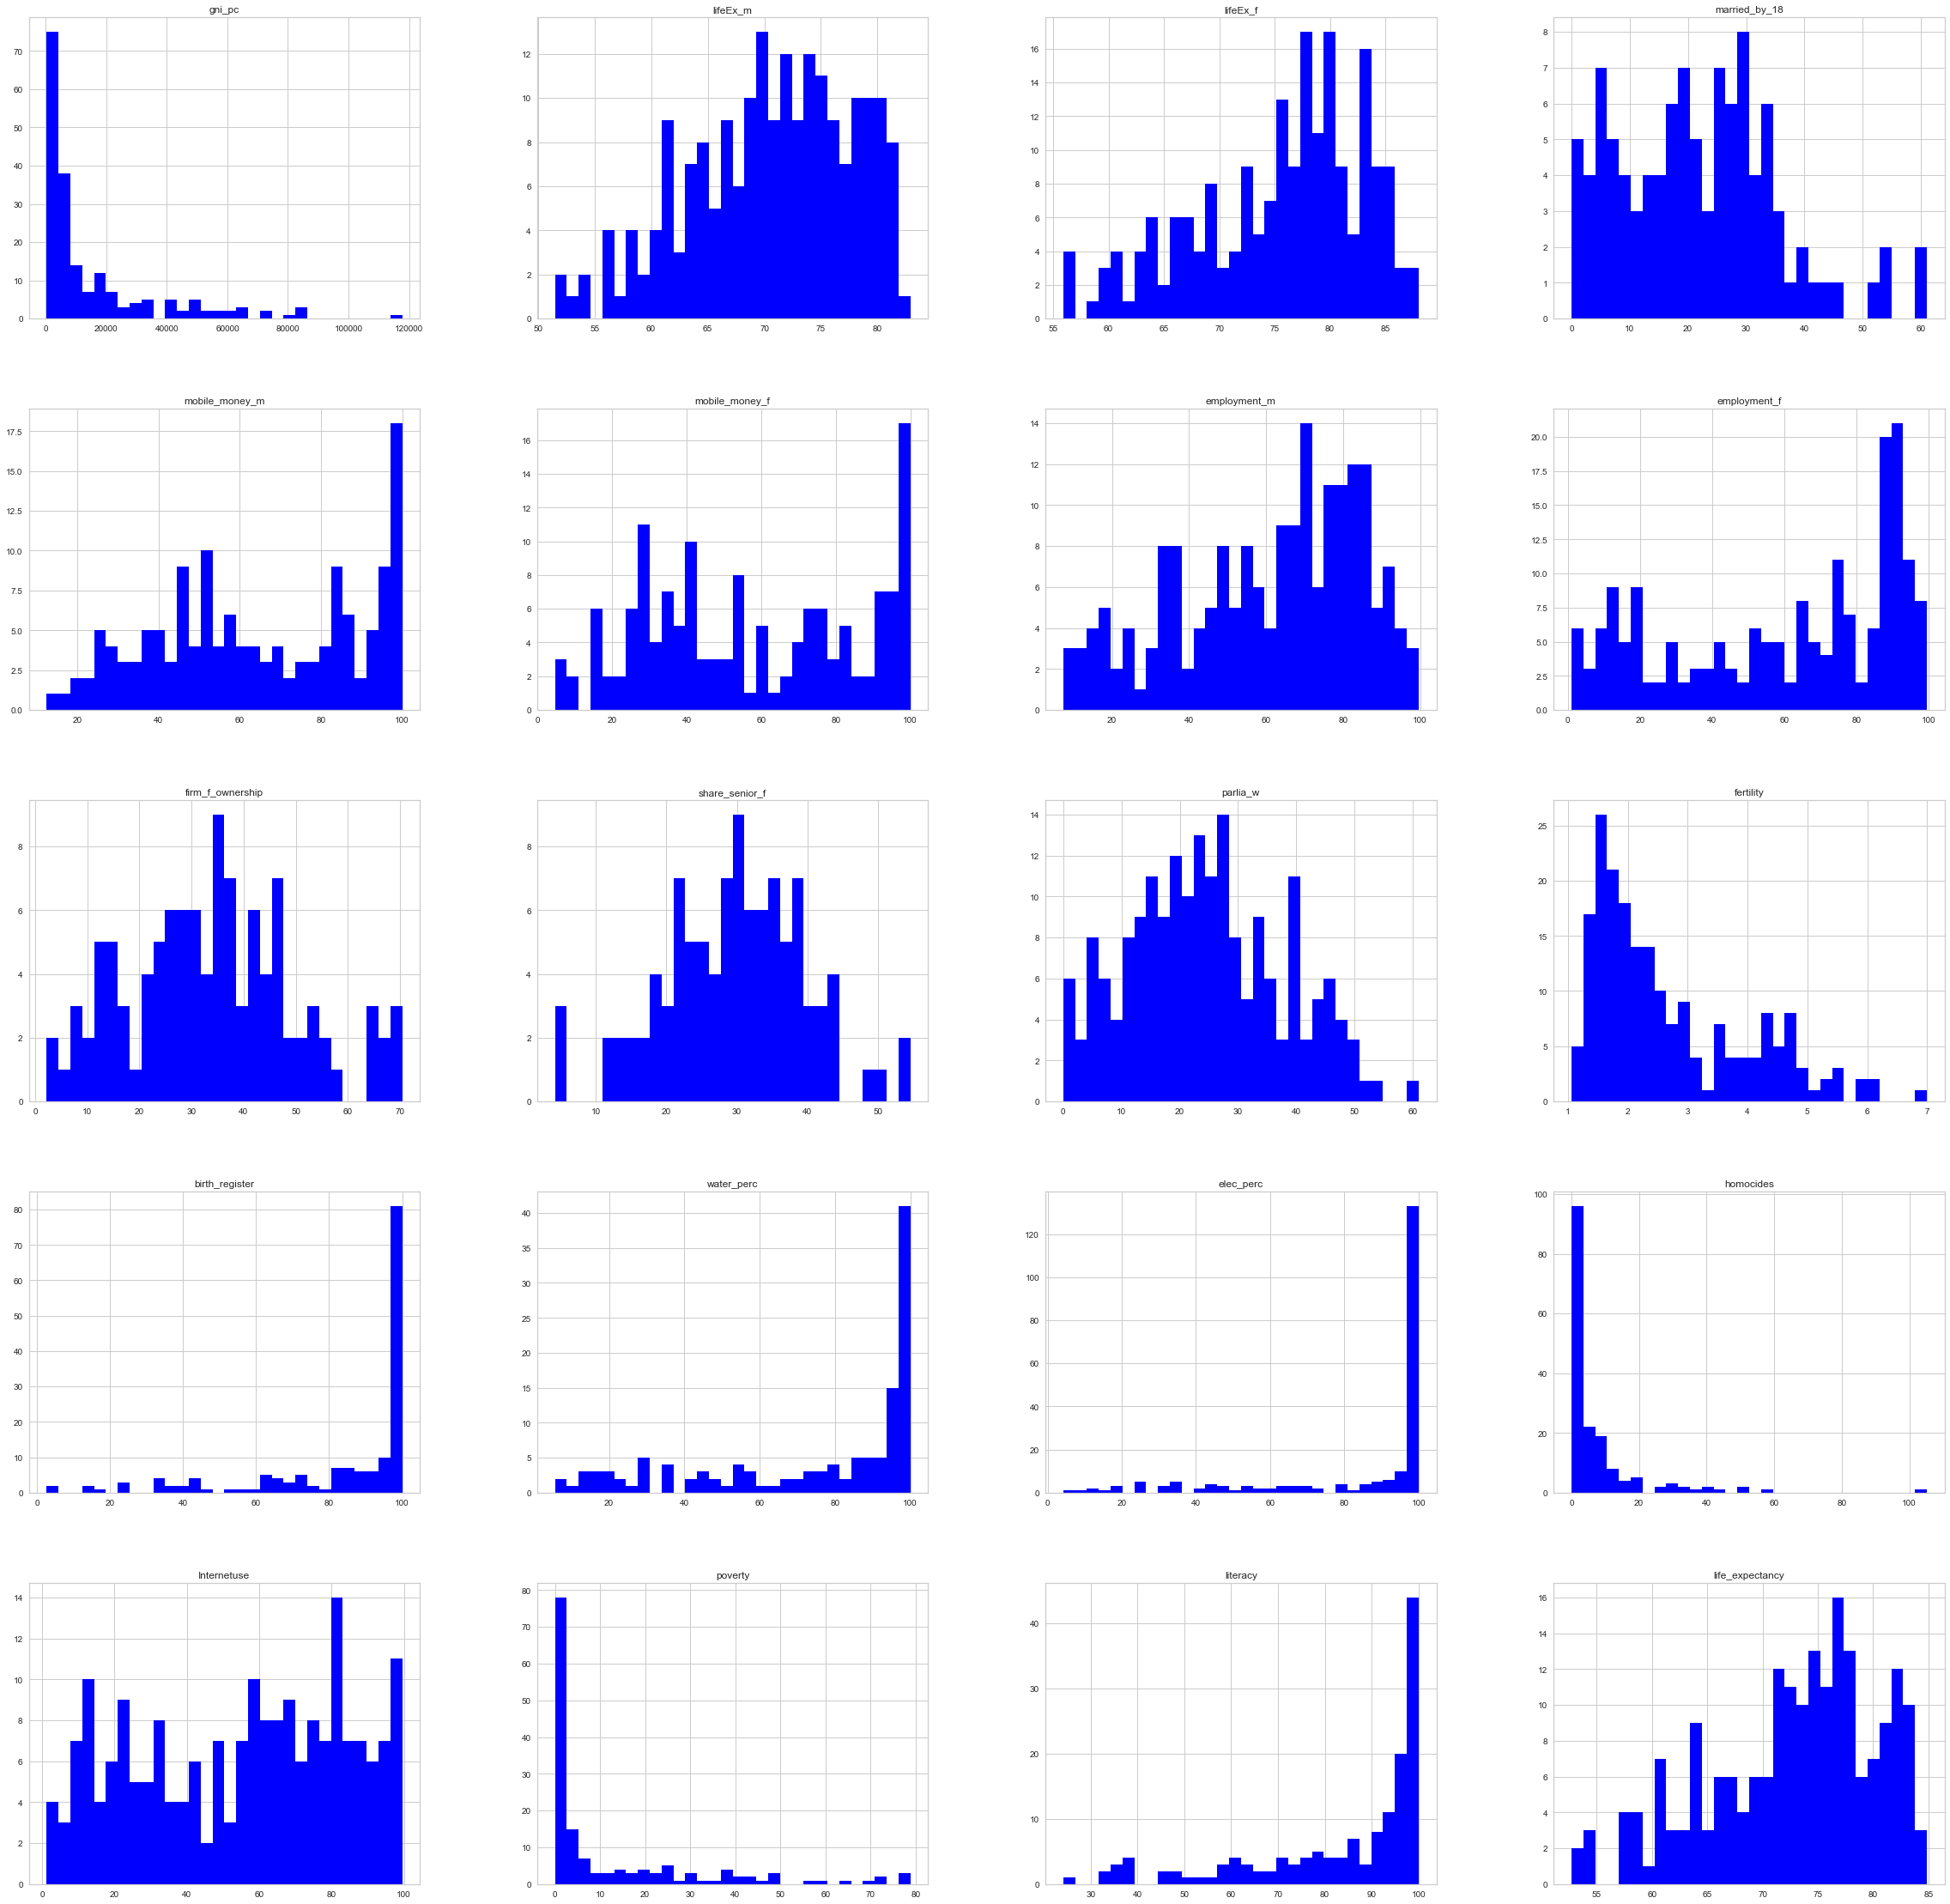

In [31]:
# Matplotlib

df_country.hist(figsize=(40,40), bins = 30, color = "blue")

## Create correlation plot

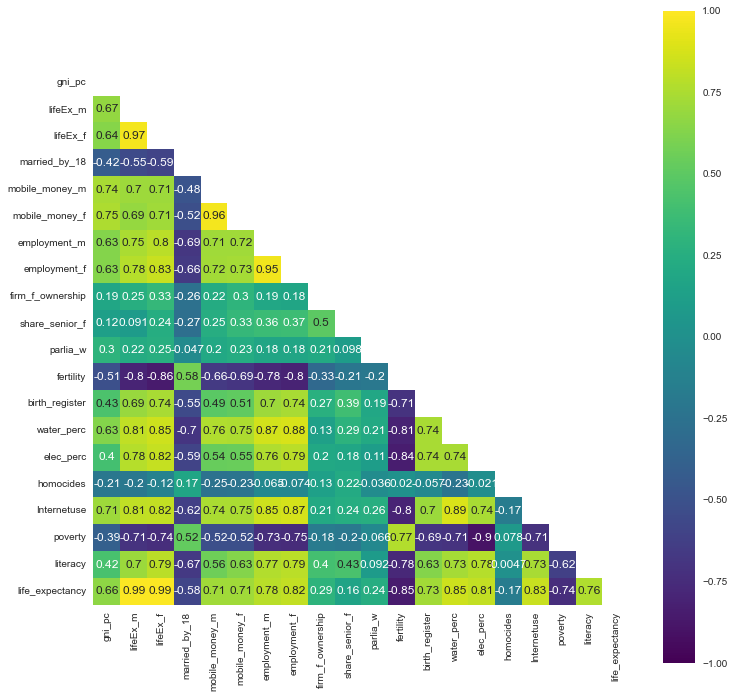

In [32]:

corr = df_country.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(12, 12)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

- as aspected we find high correlation among some variables. For gender disaggreagted variables life expectancy, mobile money and emplyment 95% or greater. Life exp can be replaced by total life expectancy variable

-> Use idependent t-test (two sample two tailed) to see if m an f are significantly different

@Nelson: Does that make sense?

In [33]:
mm = df_country[['mobile_money_m', 'mobile_money_f']]
mm.var()
mm.mean()
rp.ttest(group1= mm['mobile_money_m'], group1_name= "mobile_mon_m",
         group2= mm['mobile_money_f'], group2_name= "mobile_mon_m")

# mobile money access is different (p <0.05)


/opt/anaconda3/envs/DA/lib/python3.10/site-packages/researchpy/ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  mobile_mon_m  143.0  64.592308  25.124266  2.100997  60.439034  68.745581
 1  mobile_mon_m  143.0  57.695804  28.480134  2.381628  52.987775  62.403833
 2      combined  286.0  61.144056  27.029153  1.598267  57.998150  64.289962,
                             Independent t-test   results
 0  Difference (mobile_mon_m - mobile_mon_m) =     6.8965
 1                        Degrees of freedom =   284.0000
 2                                         t =     2.1715
 3                     Two side test p value =     0.0307
 4                    Difference < 0 p value =     0.9846
 5                    Difference > 0 p value =     0.0154
 6                                 Cohen's d =     0.2568
 7                                 Hedge's g =     0.2561
 8                             Glass's delta =     0.2745
 9                               Pearson's r =     0.1278)

In [34]:
le = df_country[['lifeEx_m', 'lifeEx_f']]
le.var()
le.mean()

rp.ttest(group1= le['lifeEx_m'], group1_name= "lifeEx_m",
         group2= le['lifeEx_f'], group2_name= "lifeEx_f")

# life expanctancy is significantly t (p <0.01) (women live longer)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/researchpy/ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N       Mean        SD        SE  95% Conf.   Interval
 0  lifeEx_m  198.0  70.586364  7.194461  0.511288  69.578063  71.594664
 1  lifeEx_f  198.0  75.461616  7.613076  0.541038  74.394647  76.528585
 2  combined  396.0  73.023990  7.789594  0.391442  72.254420  73.793560,
                     Independent t-test   results
 0  Difference (lifeEx_m - lifeEx_f) =    -4.8753
 1                Degrees of freedom =   394.0000
 2                                 t =    -6.5492
 3             Two side test p value =     0.0000
 4            Difference < 0 p value =     0.0000
 5            Difference > 0 p value =     1.0000
 6                         Cohen's d =    -0.6582
 7                         Hedge's g =    -0.6570
 8                     Glass's delta =    -0.6776
 9                       Pearson's r =     0.3133)

In [35]:
emp = df_country[['employment_m', 'employment_f']]
emp.var()
emp.mean()

rp.ttest(group1= emp['employment_m'], group1_name= "employment_m",
         group2= emp['employment_f'], group2_name= "employment_f")

# emplyment is not different --> Change to gap

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/researchpy/ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  employment_m  186.0  60.853226  23.663011  1.735056  57.430186  64.276266
 1  employment_f  186.0  59.672581  31.012206  2.273925  55.186422  64.158739
 2      combined  372.0  60.262903  27.552606  1.428536  57.453860  63.071946,
                             Independent t-test   results
 0  Difference (employment_m - employment_f) =     1.1806
 1                        Degrees of freedom =   370.0000
 2                                         t =     0.4128
 3                     Two side test p value =     0.6800
 4                    Difference < 0 p value =     0.6600
 5                    Difference > 0 p value =     0.3400
 6                                 Cohen's d =     0.0428
 7                                 Hedge's g =     0.0427
 8                             Glass's delta =     0.0499
 9                               Pearson's r =     0.0215)

In [36]:
# Create new variables and drop redundant ones

df_country['employment_gap'] = df_country['employment_m'] - df_country['employment_f']
df_country['mobilemoney_access_gap'] = df_country['mobile_money_m'] - df_country['mobile_money_f']


/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/34632058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['employment_gap'] = df_country['employment_m'] - df_country['employment_f']
/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/34632058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['mobilemoney_access_gap'] = df_country['mobile_money_m'] - df_country['mobile_money_f']


In [37]:
df_country.drop(['mobile_money_m', 'mobile_money_f', 'employment_m', 'employment_f', 
                 'lifeEx_f', 'lifeEx_m'], axis = 1, inplace = True) 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/1713288554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.drop(['mobile_money_m', 'mobile_money_f', 'employment_m', 'employment_f',


In [38]:
df_country

,gni_pc,married_by_18,firm_f_ownership,share_senior_f,parlia_w,fertility,birth_register,water_perc,elec_perc,homocides,Internetuse,poverty,literacy,life_expectancy,country,employment_gap,mobilemoney_access_gap
0,530.0,28.3,2.2,4.3,27.0,4.648857,42.300000,27.6,97.7,9.8,8.3,NaN,34.357446,64.47700,Afghanistan,12.1,15.3
1,5220.0,11.8,13.1,22.6,36.0,1.636571,98.400000,70.7,99.9,2.2,62.4,0.5,97.411140,78.44880,Albania,-3.7,3.9
2,4010.0,3.8,NaN,NaN,8.0,3.016429,99.600000,72.4,99.6,1.4,47.7,0.4,81.407837,76.68660,Algeria,-8.1,27.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.4,NaN,7.2,NaN,NaN,NaN,NaN,American Samoa,NaN,NaN
4,NaN,NaN,NaN,NaN,46.0,NaN,100.000000,90.6,100.0,0.0,91.6,NaN,NaN,NaN,Andorra,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,NaN,NaN,NaN,NaN,NaN,2.072857,NaN,97.9,100.0,49.3,64.4,NaN,NaN,79.50878,Virgin Islands (U.S.),0.0,NaN
209,4190.0,13.4,10.7,15.5,NaN,3.756571,98.133333,79.7,99.7,1.2,63.3,0.5,96.518783,73.89800,West Bank and Gaza,-7.0,18.5
210,940.0,31.9,6.6,4.5,0.0,3.901000,23.900000,NaN,79.2,6.8,26.7,18.3,NaN,66.11500,Yemen Rep.,7.0,NaN
211,1430.0,29.0,43.7,28.5,15.0,4.737714,12.700000,NaN,40.3,5.4,NaN,58.7,86.747963,63.41940,Zambia,16.7,11.4


In [39]:
df_country.columns
df_country.info


<bound method DataFrame.info of      gni_pc  married_by_18  firm_f_ownership  share_senior_f  parlia_w  \
0     530.0           28.3               2.2             4.3      27.0   
1    5220.0           11.8              13.1            22.6      36.0   
2    4010.0            3.8               NaN             NaN       8.0   
3       NaN            NaN               NaN             NaN       NaN   
4       NaN            NaN               NaN             NaN      46.0   
..      ...            ...               ...             ...       ...   
208     NaN            NaN               NaN             NaN       NaN   
209  4190.0           13.4              10.7            15.5       NaN   
210   940.0           31.9               6.6             4.5       0.0   
211  1430.0           29.0              43.7            28.5      15.0   
212  1390.0           33.7              42.5            22.8      32.0   

     fertility  birth_register  water_perc  elec_perc  homocides  Internetuse  

### outfile 

In [40]:
df_country.to_csv('220518_compiled_data.csv')

In [41]:
df = df_country

In [42]:

df = pd.read_csv('220518_compiled_data.csv') ## compiled df, used from 4. onwards

In [43]:
df.dtypes

Unnamed: 0                  int64
gni_pc                    float64
married_by_18             float64
firm_f_ownership          float64
share_senior_f            float64
parlia_w                  float64
fertility                 float64
birth_register            float64
water_perc                float64
elec_perc                 float64
homocides                 float64
Internetuse               float64
poverty                   float64
literacy                  float64
life_expectancy           float64
country                    object
employment_gap            float64
mobilemoney_access_gap    float64
dtype: object

In [44]:
df = df.fillna(df.median()) # impute missing values with medain


/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_44324/670022785.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median()) # impute missing values with medain


### Create new correlation plot

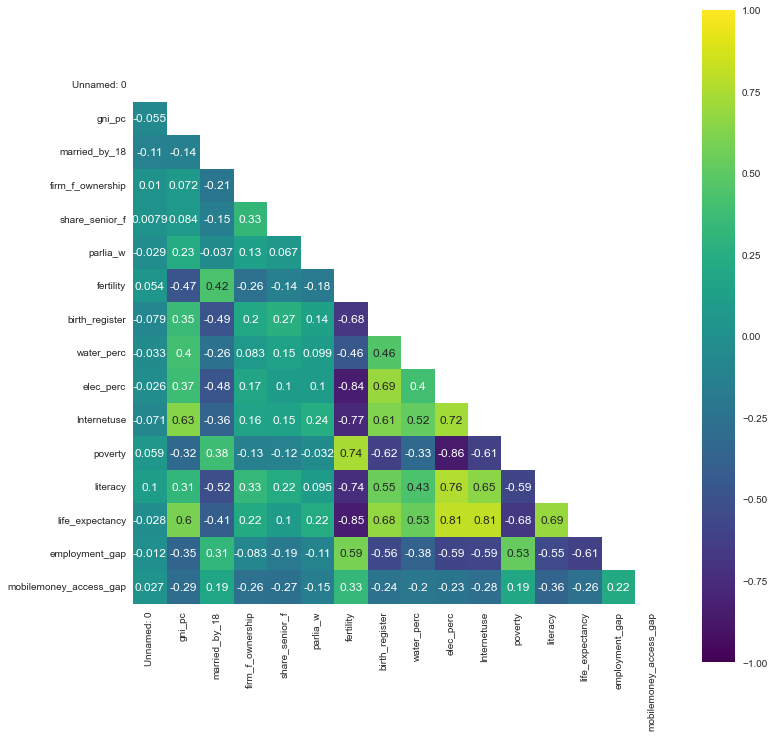

In [45]:
df_plot = df.drop(['homocides'], axis = 1) 



corr = df_plot.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(12, 12)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

In [46]:
df_plot

,Unnamed: 0,gni_pc,married_by_18,firm_f_ownership,share_senior_f,parlia_w,fertility,birth_register,water_perc,elec_perc,Internetuse,poverty,literacy,life_expectancy,country,employment_gap,mobilemoney_access_gap
0,0,530.0,28.30,2.2,4.3,27.0,4.648857,42.300000,27.60,97.7,8.3,2.2625,34.357446,64.477000,Afghanistan,12.1,15.3
1,1,5220.0,11.80,13.1,22.6,36.0,1.636571,98.400000,70.70,99.9,62.4,0.5000,97.411140,78.448800,Albania,-3.7,3.9
2,2,4010.0,3.80,34.9,30.3,8.0,3.016429,99.600000,72.40,99.6,47.7,0.4000,81.407837,76.686600,Algeria,-8.1,27.0
3,3,6090.0,21.35,34.9,30.3,24.0,2.210857,96.800000,98.40,99.9,59.4,2.2625,92.974389,74.197037,American Samoa,0.0,5.7
4,4,6090.0,21.35,34.9,30.3,46.0,2.210857,100.000000,90.60,100.0,91.6,2.2625,92.974389,74.197037,Andorra,0.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,208,6090.0,21.35,34.9,30.3,24.0,2.072857,96.800000,97.90,100.0,64.4,2.2625,92.974389,79.508780,Virgin Islands (U.S.),0.0,5.7
209,209,4190.0,13.40,10.7,15.5,24.0,3.756571,98.133333,79.70,99.7,63.3,0.5000,96.518783,73.898000,West Bank and Gaza,-7.0,18.5
210,210,940.0,31.90,6.6,4.5,0.0,3.901000,23.900000,88.95,79.2,26.7,18.3000,92.974389,66.115000,Yemen Rep.,7.0,5.7
211,211,1430.0,29.00,43.7,28.5,15.0,4.737714,12.700000,88.95,40.3,59.4,58.7000,86.747963,63.419400,Zambia,16.7,11.4


- Fertility rate, women married under 18 and poverty are highly correlated

In [47]:
f.savefig("correlation.png", dpi=300)

In [48]:
#@ Myself: if you have time, check for contribution

#  Standarizing the data

- drop povert as it is highly correlated with fertility

- use standard scaler to force all (expet country) on the same scale

In [49]:
#country = df['country'] # Seperate country to be able to change type
#df = df.drop(['country'], axis =1)
columns = df.columns # get cols to mege them to df later again
scaler = StandardScaler()

df_rescaled = scaler.fit_transform(df)
df_rescaled

ValueError: could not convert string to float: 'Afghanistan'

### get df with cols and standartized values back 

In [ ]:
df_rescaled = pd.DataFrame(data= df_rescaled, columns = columns)
df_rescaled

# K means clustering 

## Find number of clusters 

In [ ]:
sse = []  # Sum of sqt err
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_rescaled)
    sse.append(km.inertia_)


In [ ]:
## find the wlbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


- Elbow indicated there are two clusters

In [ ]:
## apply silouette 

score = silhouette_score(df_rescaled, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

In [ ]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create sioluette 
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_rescaled)

In [ ]:
K = range(2, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_rescaled)
    silhouette.append(silhouette_score(df_rescaled, kmeans.predict(df_rescaled)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
##innitiate model

km = KMeans(n_clusters = 2, init = 'random',
           n_init = 10, # number of iteration with seeds (default)
           max_iter = 300,  # max iteration (default)
           random_state = 0,
           tol = 1e-4 )

- oops --> no good solution

In [ ]:
## Apply model to scaled data set

pred_cluster = km.fit_predict(df_rescaled) # fit_predict 
pred_cluster

In [ ]:
## add clusters to standardized df
df_rescaled["cluster"] = pred_cluster
df_rescaled["country"] = country
df_rescaled

In [ ]:
df["cluster"] = pred_cluster
df["country"] = country
df

In [ ]:
##df.to_csv('220519_compiled_data_cluster.csv') # outfile

In [ ]:
# check clusters in c1
cluster_1 = df.loc[df['cluster'] == 1]

# list of countries in this country
cluster_1.country.unique()

## Visualize clusters

### Pairplot

In [ ]:
# plot

sns.pairplot(df, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

In [ ]:
cluster_means = df_rescaled.groupby('cluster').mean()

cluster_means = cluster_means.drop(['homocides'], axis = 1) 


ax = plt.figure(figsize = (15,6))
ax = sns.heatmap(cluster_means, cmap = 'viridis', 
                 vmin =-1, vmax =1, annot= True, square = True)

In [ ]:
plt.savefig("cluster_means.png", dpi=300)

### Map to world 

In [ ]:
# load example data from geodataframe 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
country_list = list(df['country'].unique())
len(country_list)

In [ ]:
code = pd.read_csv('countrycode.csv')

In [ ]:
df['cluster'] = df_rescaled["cluster"]

In [ ]:
#df

In [ ]:
list_code = [df, code]
country_code_merged = pd.merge(df, code, on='country', how='inner')

country_code_merged.columns # Check 
#df_merged.info

In [ ]:
cc = country_code_merged[['country',  'wb_country_code', 'cluster']]

In [ ]:
world_list = list(world['iso_a3'].unique())
country_list= list(country_code_merged['wb_country_code'].unique())

In [ ]:
## get a list of not matching countries

list_difference = []

for item in world_list:
  if item not in country_list:
    list_difference.append(item)

print(list_difference)

In [ ]:
## update gdp data set 

#world['name'] = world['name'].replace(
    ['W. Sahara', 'United States of America', 'Dem. Rep. Congo', 'Dominican Rep.', 
     'Russia', 'Bahamas', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Venezuela', 
     "Côte d'Ivoire", 'Central African Rep.', 'Congo', 'Eq. Guinea', 'eSwatini', 
     'Palestine', 'Gambia', 'Laos', 'North Korea', 'South Korea', 'Kyrgyzstan', 
     'Iran', 'Syria', 'Solomon Is.', 'Taiwan', 'Brunei', 'Slovakia', 'Czechia',
     'Yemen', 'Antarctica', 'N. Cyprus', 'Egypt', 'Somaliland', 'Bosnia and Herz.', 
     'Macedonia', 'S. Sudan'], 

#['Missing', 'United States', 'Congo, Dem. Rep. ', 'Dominican Republic', 'Russian Federation',
 'Bahamas, The', 'Missing', 'Missing', 'Venezuela, RB', "Cote d'Ivoire",
 'Central African Republic', 'Congo, Rep.', 'Equatorial Guinea', 'Eswatini', 'Missing', 
 'Gambia, The', 'Lao PDR', 'Korea, Dem. People\'s Rep.,' 'Korea, Rep.', 'Kyrgyz Republic', 
 'Iran, Islamic Rep.', ' Syrian Arab Republic', 'Solomon Islands', 'Missing', 'Brunei Darussalam', 
 'Slovak Republic', 'Czech Republic', 'Yemen, Rep.', 'Missing', 'Missing', 'Egypt Arab Republic', 'Missing',
 'Bosnia and Herzegovina ', 'Missing', 'South Sudan'])


In [ ]:
#list_1 = ['W. Sahara', 'United States of America', 'Dem. Rep. Congo', 'Dominican Rep.', 
     'Russia', 
    'Bahamas', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Venezuela',  "Côte d'Ivoire", 
    'Central African Rep.', 'Congo', 'Eq. Guinea', 'eSwatini', 'Palestine', 
    'Gambia', 'Laos', 'North Korea', 'South Korea', 'Kyrgyzstan', 
     'Iran', 'Syria', 'Solomon Is.', 'Taiwan', 'Brunei', 
    'Slovakia', 'Czechia','Yemen', 'Antarctica', 'N. Cyprus', 
    'Egypt', 'Somaliland', 'Bosnia and Herz.', 'Macedonia', 'S. Sudan']

#list_2 = ['Missing', 'United States', 'Congo, Dem. Rep.', 'Dominican Republic', 'Russian Federation',
 'Bahamas, The', 'Missing', 'Missing', 'Venezuela, RB', 'Cote d\'Ivoire',
 'Central African Republic', 'Congo, Rep.', 'Equatorial Guinea', 'Eswatini', 'Missing', 
 'Gambia, The', 'Lao PDR', 'Korea, Dem. People\'s Rep.,' 'Korea, Rep.', 'Kyrgyz Republic', 
 'Iran, Islamic Rep.', 'Syrian Arab Republic', 'Solomon Islands', 'Missing', 'Brunei Darussalam', 
 'Slovak Republic', 'Czech Republic', 'Yemen, Rep.', 'Missing', 'Missing', 
'Egypt Arab Republic', 'Missing', 'Bosnia and Herzegovina', 'Missing', 'South Sudan']

#print("Missing values in second list:", (set(list_1).difference(list_2)))

len(list_2)

- rename doesnt work, proceed to plotting without

In [ ]:
world.rename(columns = {'iso_a3' : 'wb_country_code'}, inplace = True)

In [ ]:
world_data = pd.merge(cc, world, on='country', how= 'inner')

In [ ]:
world_data = pd.merge(cc, world, on='country', how= 'inner')

In [ ]:
cc

In [ ]:
world_df.plot

In [ ]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.plot(column = 'cluster', cmaps ='Reds')

In [ ]:
import geoplot
import mapclassify
cluster = world_df['cluster']

In [ ]:
geoplot.choropleth(
    world_df, 
    hue=cluster,
    cmap='blues', 
    figsize=(16, 8),
    legend = True
)

# run PCA (explorartory)

In [ ]:
### Maybe reduction of dimesnions is useful to compare with clusters?

In [ ]:
country = df_rescaled['country'] # Seperate country to be able to change type
df_rescaled = df_rescaled.drop(['country'], axis =1)

In [ ]:
## drop country cariable again 

In [ ]:
pca = PCA()
pca.fit(df_rescaled)

pca_rescaled = pca.transform(df_rescaled)


perc_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(perc_var)+1)]

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [ ]:
## PCA plot


pca_rescaled = pd.DataFrame(pca_rescaled, columns = labels)
plt.scatter(pca_rescaled.PC1, pca_rescaled.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

-- All over the show.Need to change vars

 # Try only gender variables 

In [ ]:
df.columns

df['country'] = country
df

In [ ]:
df_gender = df[['country', 'gni_pc', 'married_by_18',
       'firm_f_ownership', 'share_senior_f', 'parlia_w', 'fertility', 'literacy', 
    'life_expectancy', 'employment_gap', 'mobilemoney_access_gap']]

In [ ]:
df_gender

In [ ]:
df_gender = df_gender.fillna(df_gender.median()) # impute missing values with medain

In [ ]:
# Percent missing 

percent_missing= df_gender.isnull().sum() * 100 / len(df_gender)
percent_missing

In [ ]:

corr = df_gender.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(12, 12)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

In [ ]:
df_gender = df_gender.drop(['country'], axis =1)
columns = df_gender.columns # get cols to mege them to df later again
scaler = StandardScaler()
df_gender_rescaled = scaler.fit_transform(df_gender)
df_gender_rescaled
df_gender_rescaled = pd.DataFrame(data= df_gender_rescaled, columns = columns)
df_gender_rescaled

In [ ]:
df_gender

- Remove infinite values

In [ ]:
sse = []  # Sum of sqt err
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(df_gender_rescaled)
    sse.append(km.inertia_)

In [ ]:
## find the wlbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

- Gender kmean also 2 clusters

In [ ]:
##innitiate model

km = KMeans(n_clusters = 2, init = 'random',
           n_init = 10, # number of iteration with seeds (default)
           max_iter = 300,  # max iteration (default)
           random_state = 0,
           tol = 1e-4 )

In [ ]:
## Apply model to scaled data set

pred_cluster_gen = km.fit_predict(df_gender_rescaled) # fit_predict 
pred_cluster_gen



In [ ]:
## add clusters to standardized df
df_gender_rescaled["cluster"] = pred_cluster_gen
df_gender_rescaled["country"] = country
df_gender_rescaled


df_gender["cluster"] = pred_cluster_gen
df_gender["country"] = country
df_gender

# Visualize gender clusters

In [ ]:
# plot

sns.pairplot(df, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Variable', 
             size = 20);

In [ ]:
cluster_means = df_gender_rescaled.groupby('cluster').mean()

plt.figure(figsize = (15,8))

ax = sns.heatmap(cluster_means, cmap = 'coolwarm', 
                 vmin =-1, vmax =1, annot= True, square = True)

## Compare clusters of gender variables only and overall development

In [ ]:
compare = df_gender[['country', 'cluster']]

In [ ]:
df_combined = pd.merge(df,df_gender[['country', 'cluster']],on= 'country', how='left')

In [ ]:
df_combined

In [ ]:
comp = [x for x in df_combined['cluster_x'] if x in df_combined['cluster_y']]

# all the x values that are in cluster_x', if the x value is in cluster_y".

len(comp)

- Only Gabon has a differnt gender thena overall cluster

In [ ]:

pd.set_option('display.max_rows', None) 

In [ ]:
comp

In [ ]:
df_combined.sort_values(by=['gni_pc'])

In [ ]:
Or "all the x values that are in A, if the X value is in B".

In [ ]:
# Replacing infinite with nan
df_gender.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
df_gender.dropna(inplace=True)

# Printing df
df_gender

## DOESNT WORK - How to get rid of infinite values?

### Try gender without income 

In [ ]:
df_gender2 = df[['country', 'married_by_18',
       'firm_f_ownership', 'share_senior_f', 'parlia_w', 'fertility', 'literacy', 
    'life_expectancy', 'employment_gap', 'mobilemoney_access_gap']]

In [ ]:

corr = df_gender2.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(12, 12)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)
    

In [ ]:
#df_gender2 = df_gender2.drop(['country'], axis =1)
columns = df_gender2.columns # get cols to mege them to df later again
scaler = StandardScaler()
df_gender_rescaled2 = scaler.fit_transform(df_gender2)
df_gender_rescaled2
df_gender_rescaled2 = pd.DataFrame(data= df_gender_rescaled2, columns = columns)
df_gender_rescaled2

sse = []  # Sum of sqt err
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(df_gender_rescaled2)
    sse.append(km.inertia_)
    
## find the wlbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()